In [1]:
import pandas as pd
import sqlalchemy

In [2]:
sqlalchemy.__version__

'1.2.15'

In [3]:
%run keys.py

# DataCamp [Joining Data in PostgresQL](https://www.datacamp.com/courses/joining-data-in-postgresql)

In [4]:
df_city = pd.read_sql_table('cities',engine)
df_city.head(5)

,name,country_code,city_proper_pop,metroarea_pop,urbanarea_pop
0,Abidjan,CIV,4765000.0,NaN,4765000.0
1,Abu Dhabi,ARE,1145000.0,NaN,1145000.0
2,Abuja,NGA,1235880.0,6000000.0,1235880.0
3,Accra,GHA,2070460.0,4010050.0,2070460.0
4,Addis Ababa,ETH,3103670.0,4567860.0,3103670.0


In [5]:
query_1 = """
SELECT cities.name AS city,
       countries.name AS country,
       region
FROM cities
INNER JOIN countries
ON cities.country_code = countries.code;"""

query1 = pd.read_sql_query(query_1, engine)
query1.head()

,city,country,region
0,Abidjan,Cote d'Ivoire,Western Africa
1,Abu Dhabi,United Arab Emirates,Middle East
2,Abuja,Nigeria,Western Africa
3,Accra,Ghana,Western Africa
4,Addis Ababa,Ethiopia,Eastern Africa


In [6]:
query_2 = """
SELECT c.code AS country_code, name, year, inflation_rate
FROM countries AS c
INNER JOIN economies AS e
ON c.code = e.code;"""

query2 = pd.read_sql_query(query_2, engine)
query2.head()

,country_code,name,year,inflation_rate
0,AFG,Afghanistan,2010,2.179
1,AFG,Afghanistan,2015,-1.549
2,AGO,Angola,2010,14.480
3,AGO,Angola,2015,10.287
4,ALB,Albania,2010,3.605


In [7]:
query_3 = """
SELECT code,
        name,
        region,
        year,
        fertility_rate
FROM countries AS c
INNER JOIN populations AS p
ON c.code = p.country_code"""

query3 = pd.read_sql_query(query_3, engine)
query3.head()

,code,name,region,year,fertility_rate
0,ABW,Aruba,Caribbean,2010,1.704
1,ABW,Aruba,Caribbean,2015,1.647
2,AFG,Afghanistan,Southern and Central Asia,2010,5.746
3,AFG,Afghanistan,Southern and Central Asia,2015,4.653
4,AGO,Angola,Central Africa,2010,6.416


In [8]:
query_4 = """
SELECT c.code, name, region, e.year, fertility_rate, unemployment_rate
FROM countries AS c
INNER JOIN populations AS p
ON c.code = p.country_code
INNER JOIN economies AS e
ON c.code = e.code;"""

query4 = pd.read_sql_query(query_4, engine)
query4.head()

,code,name,region,year,fertility_rate,unemployment_rate
0,AFG,Afghanistan,Southern and Central Asia,2015,5.746,NaN
1,AFG,Afghanistan,Southern and Central Asia,2010,5.746,NaN
2,AFG,Afghanistan,Southern and Central Asia,2015,4.653,NaN
3,AFG,Afghanistan,Southern and Central Asia,2010,4.653,NaN
4,AGO,Angola,Central Africa,2015,6.416,NaN


## There are issues with multiple year tracking:

In [9]:
query_4_issues = query4[query4.name == "Albania"]
query_4_issues

,code,name,region,year,fertility_rate,unemployment_rate
8,ALB,Albania,Southern Europe,2015,1.663,17.1
9,ALB,Albania,Southern Europe,2010,1.663,14.0
10,ALB,Albania,Southern Europe,2015,1.793,17.1
11,ALB,Albania,Southern Europe,2010,1.793,14.0


In [10]:
# SOLUTION:
query_5 = """
SELECT c.code, name, region, e.year, fertility_rate, unemployment_rate
FROM countries AS c
INNER JOIN populations AS p
ON c.code = p.country_code
INNER JOIN economies AS e
ON c.code = e.code AND p.year = e.year;"""

query5 = pd.read_sql_query(query_5, engine)
print(query5[query5.name == "Albania"])
query5.head()

  code     name           region  year  fertility_rate  unemployment_rate
4  ALB  Albania  Southern Europe  2010           1.663               14.0
5  ALB  Albania  Southern Europe  2015           1.793               17.1


,code,name,region,year,fertility_rate,unemployment_rate
0,AFG,Afghanistan,Southern and Central Asia,2010,5.746,NaN
1,AFG,Afghanistan,Southern and Central Asia,2015,4.653,NaN
2,AGO,Angola,Central Africa,2010,6.416,NaN
3,AGO,Angola,Central Africa,2015,5.996,NaN
4,ALB,Albania,Southern Europe,2010,1.663,14.0


In [11]:
query_6 = """
SELECT c.name AS country, continent, l.name AS language, official
FROM countries AS c
INNER JOIN languages AS l
USING(code);"""

query6 = pd.read_sql_query(query_6, engine)
query6.head()

,country,continent,language,official
0,Afghanistan,Asia,Dari,True
1,Afghanistan,Asia,Pashto,True
2,Afghanistan,Asia,Turkic,False
3,Afghanistan,Asia,Other,False
4,Albania,Europe,Albanian,True


# Self - Joins

In [12]:
query_7 = """
SELECT p1.country_code, 
       p1.size AS size2010,
       p2.size AS size2015
FROM populations AS p1
INNER JOIN populations AS p2
ON  p1.country_code = p2.country_code;"""

query7 = pd.read_sql_query(query_7, engine)
query7.head()

,country_code,size2010,size2015
0,ABW,101597.0,103889.0
1,ABW,101597.0,101597.0
2,ABW,103889.0,103889.0
3,ABW,103889.0,101597.0
4,AFG,27962200.0,32526600.0


## Omit the 3 entries per year that we are not interested in:

In [13]:
query_8 = """
SELECT p1.country_code, 
       p1.size AS size2010,
       p2.size AS size2015
FROM populations AS p1
INNER JOIN populations AS p2
ON p1.country_code = p2.country_code
    AND p1.year = p2.year - 5;"""

query8 = pd.read_sql_query(query_8, engine)
query8.head()

,country_code,size2010,size2015
0,ABW,101597.0,103889.0
1,AFG,27962200.0,32526600.0
2,AGO,21220000.0,25022000.0
3,ALB,2913020.0,2889170.0
4,AND,84419.0,70473.0


In [14]:
query_9 = """
SELECT p1.country_code, 
       p1.size AS size2010,
       p2.size AS size2015,
       ((p2.size - p1.size)/p1.size * 100.0) AS growth_perc
FROM populations AS p1
INNER JOIN populations AS p2
ON p1.country_code = p2.country_code
    AND p1.year = p2.year - 5;"""

query9 = pd.read_sql_query(query_9, engine)
query9.head()

,country_code,size2010,size2015,growth_perc
0,ABW,101597.0,103889.0,2.255972
1,AFG,27962200.0,32526600.0,16.323297
2,AGO,21220000.0,25022000.0,17.917192
3,ALB,2913020.0,2889170.0,-0.818875
4,AND,84419.0,70473.0,-16.519977


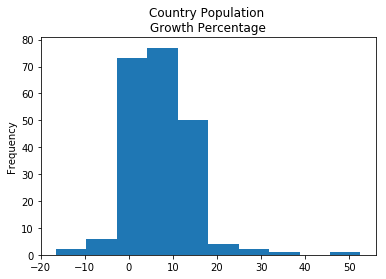

In [15]:
%matplotlib inline
query9.growth_perc.plot(kind='hist', title='Country Population \nGrowth Percentage')

In [16]:
query_10 = """
SELECT name, continent, code, surface_area,
        -- first case
    CASE WHEN surface_area > 2000000 THEN 'large'
        -- second case
        WHEN surface_area > 350000 THEN 'medium'
        -- else clause + end
        ELSE 'small' END
        AS geosize_group
FROM countries;"""

query10 = pd.read_sql_query(query_10, engine)
query10.head()

,name,continent,code,surface_area,geosize_group
0,Afghanistan,Asia,AFG,652090.0,medium
1,Netherlands,Europe,NLD,41526.0,small
2,Albania,Europe,ALB,28748.0,small
3,Algeria,Africa,DZA,2381740.0,large
4,American Samoa,Oceania,ASM,199.0,small


## Writing a query into a new table:

```SQL
SELECT name, continent, code, surface_area,
    CASE WHEN surface_area > 2000000
            THEN 'large'
       WHEN surface_area > 350000
            THEN 'medium'
       ELSE 'small' END
       AS geosize_group
INTO countries_plus
FROM countries;
```

In [17]:
query_11 = """
SELECT country_code, size,
    CASE WHEN size > 50000000 THEN 'large'
        WHEN size > 1000000 THEN 'medium'
        ELSE 'small' END
        AS popsize_group
INTO pop_plus
FROM populations
WHERE year = 2015;

SELECT name, continent, geosize_group, popsize_group
FROM countries_plus AS c
INNER JOIN pop_plus AS p
ON c.code = p.country_code
ORDER BY geosize_group"""

query11 = pd.read_sql_query(query_11, engine)
query11.head()

,name,continent,geosize_group,popsize_group
0,India,Asia,large,large
1,United States,North America,large,large
2,Saudi Arabia,Asia,large,medium
3,China,Asia,large,large
4,Kazakhstan,Asia,large,medium


# Inner vs. Outer Joins

In [18]:
query_12 = """
-- get the city name (and alias it), the country code,
-- the country name (and alias it), the region,
-- and the city proper population
SELECT c1.name AS city, code, c2.name AS country,
       region, city_proper_pop
-- specify left table
FROM cities AS c1
-- specify right table and type of join
INNER JOIN countries AS c2
-- how should the tables be matched?
ON c1.country_code = c2.code
-- sort based on descending country code
ORDER BY code DESC;"""

query12 = pd.read_sql_query(query_12, engine)
print('The length of the resulting table for INNER JOIN is:', len(query12))
query12.head()

The length of the resulting table for INNER JOIN is: 230


,city,code,country,region,city_proper_pop
0,Harare,ZWE,Zimbabwe,Eastern Africa,1606000.0
1,Lusaka,ZMB,Zambia,Eastern Africa,1742980.0
2,Cape Town,ZAF,South Africa,Southern Africa,3740030.0
3,Johannesburg,ZAF,South Africa,Southern Africa,4434830.0
4,Durban,ZAF,South Africa,Southern Africa,3442360.0


In [19]:
query_13 = """
-- get the city name (and alias it), the country code,
-- the country name (and alias it), the region,
-- and the city proper population
SELECT c1.name AS city, code, c2.name AS country,
       region, city_proper_pop
-- specify left table
FROM cities AS c1
-- specify right table and type of join
LEFT JOIN countries AS c2
-- how should the tables be matched?
ON c1.country_code = c2.code
-- sort based on descending country code
ORDER BY code DESC;"""

query13 = pd.read_sql_query(query_13, engine)
print('The length of the resulting table for LEFT JOIN is:', len(query13))
print('Therefore, there are', len(query13) - len(query12), 'records that are in the right table which are not in the left.')
query13.head(7)

The length of the resulting table for LEFT JOIN is: 236
Therefore, there are 6 records that are in the right table which are not in the left.


,city,code,country,region,city_proper_pop
0,Taichung,None,None,None,2752410.0
1,Tainan,None,None,None,1885250.0
2,Kaohsiung,None,None,None,2778920.0
3,Bucharest,None,None,None,1883420.0
4,Taipei,None,None,None,2704970.0
5,New Taipei City,None,None,None,3954930.0
6,Harare,ZWE,Zimbabwe,Eastern Africa,1606000.0


In [20]:
query_14 = """
/*
select country name AS country, the country's local name,
the language name AS language, and
the percent of the language spoken in the country
*/
SELECT c.name AS country, local_name, l.name AS language, percent
-- countries on the left (alias as c)
FROM countries AS c
-- appropriate join with languages (as l) on the right
LEFT JOIN languages AS l
-- give fields to match on
ON c.code = l.code
-- sort by descending country name
ORDER BY country DESC;"""

query14 = pd.read_sql_query(query_14, engine)
query14.head()

,country,local_name,language,percent
0,Zimbabwe,Zimbabwe,Chibarwe,NaN
1,Zimbabwe,Zimbabwe,Shona,NaN
2,Zimbabwe,Zimbabwe,Ndebele,NaN
3,Zimbabwe,Zimbabwe,English,NaN
4,Zimbabwe,Zimbabwe,Chewa,NaN


**Zimbabwe is included in the above table because it is `LEFT JOIN`ed and does not include the percentage of the population that speaks any of the indicated languages.**

In [21]:
query_15 = """
-- Select region, average gdp_percapita (alias avg_gdp)
SELECT region, AVG(gdp_percapita) AS avg_gdp
-- From countries (alias c) on the left
FROM countries AS c
-- Join with economies (alias e)
LEFT JOIN economies AS e
-- Match on code fields
ON c.code = e.code
-- Focus on 2010 
WHERE year = 2010
-- Group by region
GROUP BY region
-- Order by avg_gdp, descending
ORDER BY avg_gdp DESC;"""

query15 = pd.read_sql_query(query_15, engine)
query15.head()

,region,avg_gdp
0,Western Europe,58130.961496
1,Nordic Countries,57073.997656
2,North America,47911.509766
3,Australia and New Zealand,44792.384766
4,British Islands,43588.330078


In [22]:
query_16 = """
-- convert this code to use RIGHT JOINs instead of LEFT JOINs
/*
SELECT cities.name AS city, urbanarea_pop, countries.name AS country,
       indep_year, languages.name AS language, percent
FROM cities
LEFT JOIN countries
ON cities.country_code = countries.code
LEFT JOIN languages
ON countries.code = languages.code
ORDER BY city, language;
*/

SELECT cities.name AS city, urbanarea_pop, countries.name AS country,
       indep_year, languages.name AS language, percent
FROM languages
RIGHT JOIN countries
ON languages.code = countries.code
RIGHT JOIN cities
ON countries.code = cities.country_code
ORDER BY city, language;"""

query16 = pd.read_sql_query(query_16, engine)
query16.head()

,city,urbanarea_pop,country,indep_year,language,percent
0,Abidjan,4765000.0,Cote d'Ivoire,1960.0,French,NaN
1,Abidjan,4765000.0,Cote d'Ivoire,1960.0,Other,NaN
2,Abu Dhabi,1145000.0,United Arab Emirates,1971.0,Arabic,NaN
3,Abu Dhabi,1145000.0,United Arab Emirates,1971.0,English,NaN
4,Abu Dhabi,1145000.0,United Arab Emirates,1971.0,Hindi,NaN


In [27]:
query_17 = """
SELECT name AS country, code, region, basic_unit
FROM countries
FULL JOIN currencies
USING (code)
WHERE region = 'North America' OR region IS NULL
ORDER BY region;"""

query17 = pd.read_sql_query(query_17, engine)
query17.head()

,country,code,region,basic_unit
0,Canada,CAN,North America,Canadian dollar
1,United States,USA,North America,United States dollar
2,Bermuda,BMU,North America,Bermudian dollar
3,Greenland,GRL,North America,None
4,None,TMP,None,United States dollar


In [48]:
query_18 = """
SELECT c1.name AS country, region, l.name AS language,
       basic_unit, frac_unit
FROM countries AS c1
FULL JOIN languages AS l
USING (code)
FULL JOIN currencies AS c2
USING (code)
WHERE region LIKE 'M%esia';"""

df = pd.read_sql_query(query_18, engine)
df.head()

TypeError: 'dict' object does not support indexing